# **<center><span style= "color:green;">Logistic regression</span></center>**

In [6]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [29]:
# data import
df = sns.load_dataset('titanic')
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [30]:
# preprocessing the data 

# remove the deck column
df.drop('deck',axis=1, inplace=True)

# impute the missing values in age, fare, embarked, embarked
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

# encode the categorical variables using for loop
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])

df.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True
5,0,3,1,28.0,0,0,8.4583,1,2,1,True,1,0,True
6,0,1,1,54.0,0,0,51.8625,2,0,1,True,2,0,True
7,0,3,1,2.0,3,1,21.0750,2,2,0,False,2,0,False
8,1,3,0,27.0,0,2,11.1333,2,2,2,False,2,1,False
9,1,2,0,14.0,1,0,30.0708,0,1,0,False,0,1,False


In [42]:
# split the df into dependent and independent variables
X = df.drop('survived', axis = 1)
y = df['survived']

In [43]:
y.value_counts().sum()

np.int64(891)

In [44]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [45]:
model = LogisticRegression()


In [46]:
model.fit(X_train,y_train)

c:\Users\shera\anaconda3\envs\python_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
y_pred = model.predict(X_test)

In [49]:
# evaluate the model
print('accuracy score',accuracy_score(y_test,y_pred))
print('Recall score',recall_score(y_test,y_pred))
print('Precision score',precision_score(y_test,y_pred))
print('F1 score',f1_score(y_test,y_pred))
print('confusion matrix \n',confusion_matrix(y_test,y_pred))
print('Classification report \n',classification_report(y_test,y_pred))

accuracy score 1.0
Recall score 1.0
Precision score 1.0
F1 score 1.0
confusion matrix 
 [[106   0]
 [  0  73]]
Classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00        73

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



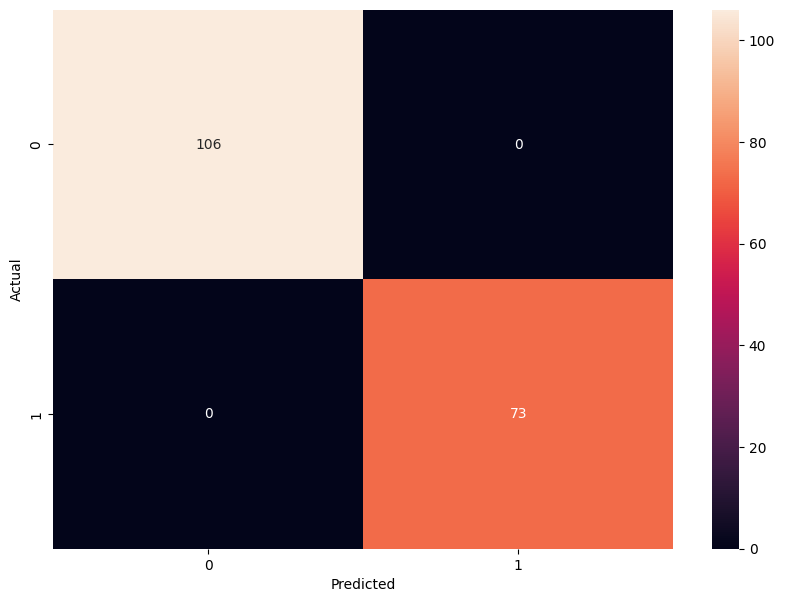

In [52]:
# plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [54]:
# save the model
import pickle
pickle.dump(model, open('saved_models/LogisticRegression.pkl', 'wb'))